In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDI/Implementation/Epileptic Seizure Recognition.csv')

In [ ]:
df.head(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [ ]:
print(df.shape)

(11500, 180)


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]
def toBinary(x):
    if x != 1: return 0;
    else: return 1;
y = y['y'].apply(toBinary)
y = pd.DataFrame(data=y)
y

,y
0,0
1,1
2,0
3,0
4,0
...,...
11495,0
11496,1
11497,0
11498,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df = df.drop(columns = ['Unnamed'])
X = df.drop(columns=['y'])
#y = df['y']
y = pd.DataFrame(data=y)
scaler = StandardScaler()
X = scaler.fit_transform(X)

enc = LabelEncoder()
y = enc.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [ ]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
X_train.shape

(7705, 178)

In [ ]:
from keras.models import Sequential

model = Sequential()

In [ ]:
from keras.layers import Dense

model.add(Dense(32, activation='relu', input_shape=(1,178)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 32)             5728      
                                                                 
 dense_1 (Dense)             (None, 1, 32)             1056      
                                                                 
 dense_2 (Dense)             (None, 1, 32)             1056      
                                                                 
 dense_3 (Dense)             (None, 1, 2)              66        
                                                                 
Total params: 7,906
Trainable params: 7,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical
import tensorflow as tf


tf.config.run_functions_eagerly(True)


X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X, y, test_size=0.33, random_state=42)
print(type(X_train))
#X_train_ann = np.array([X_train_ann])

l1 = X_train_ann.tolist()

for i in range(0,len(l1)):
  temp = []
  temp.append(l1[i])
  l1[i] =  temp
X_train_ann = np.array(l1)
print((X_train_ann.shape))



l1 = X_val_ann.tolist()
for i in range(0,len(l1)):
  temp = []
  temp.append(l1[i])
  l1[i] =  temp
X_val_ann = np.array(l1)






y_train_ann = to_categorical(y_train_ann, 2)

l1 = y_train_ann.tolist()
for i in range(0,len(l1)):
  temp = []
  temp.append(l1[i])
  l1[i] =  temp

y_train_ann = np.array(l1) 





y_val_ann = to_categorical(y_val_ann, 2)


l1 = y_val_ann.tolist()
for i in range(0,len(l1)):
  temp = []
  temp.append(l1[i])
  l1[i] =  temp

y_val_ann = np.array(l1) 



<class 'numpy.ndarray'>
(7705, 1, 178)


In [ ]:
history = model.fit(X_train_ann, y_train_ann, epochs=10)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
241/241 [==============================] - 11s 46ms/step - loss: 0.3572 - accuracy: 0.9142
Epoch 2/10
241/241 [==============================] - 11s 47ms/step - loss: 0.1224 - accuracy: 0.9665
Epoch 3/10
241/241 [==============================] - 5s 22ms/step - loss: 0.0868 - accuracy: 0.9731
Epoch 4/10
241/241 [==============================] - 5s 22ms/step - loss: 0.0692 - accuracy: 0.9781
Epoch 5/10
241/241 [==============================] - 5s 21ms/step - loss: 0.0571 - accuracy: 0.9814
Epoch 6/10
241/241 [==============================] - 5s 22ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 7/10
241/241 [==============================] - 13s 55ms/step - loss: 0.0431 - accuracy: 0.9851
Epoch 8/10
241/241 [==============================] - 11s 44ms/step - loss: 0.0380 - accuracy: 0.9873
Epoch 9/10
241/241 [==============================] - 5s 22ms/step - loss: 0.0366 - accuracy: 0.9875
Epoch 10/10
241/241 [==============================] - 5s 23ms/step - loss: 0.0367 - ac

In [ ]:
result = model.evaluate(X_val_ann, y_val_ann)

119/119 [==============================] - 2s 14ms/step - loss: 0.0870 - accuracy: 0.9705


In [ ]:
print("Loss:",result[0])
print("Accuracy",result[1])

Loss: 0.08697971701622009
Accuracy 0.9704874753952026


In [ ]:
import matplotlib.pyplot as plt

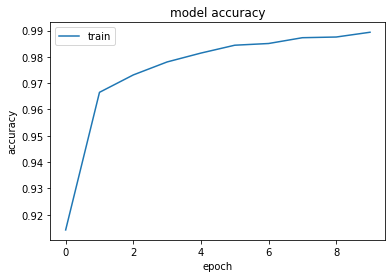

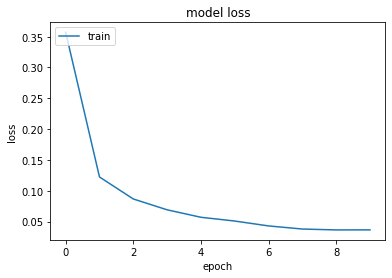

In [ ]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
temp = model.predict(X_val_ann)



119/119 [==============================] - 1s 7ms/step


In [ ]:
print(temp.tolist())
y_pred = []
for i in temp.tolist():
  y_pred.append(i[0].index(max(i[0])))
print(y_pred)


print(temp.tolist())
y_act = []
for i in y_val_ann.tolist():
  y_act.append(i[0].index(max(i[0])))
print(y_act)




[[[0.9999998211860657, 8.07617439591013e-08]], [[0.9999997019767761, 2.526558091631159e-07]], [[0.9999983906745911, 1.5390918406410492e-06]], [[0.999999463558197, 5.094687480777793e-07]], [[0.9999998211860657, 1.1107059094683791e-07]], [[0.9999992251396179, 7.236798182930215e-07]], [[0.9999995827674866, 3.710372880050272e-07]], [[0.9999999403953552, 3.371502188542763e-08]], [[0.9999999403953552, 4.716329016218879e-08]], [[0.00594344362616539, 0.9940565824508667]], [[0.9999985098838806, 1.415195129084168e-06]], [[0.9999999403953552, 2.5973911021992535e-08]], [[0.9999999403953552, 1.1211882977590903e-08]], [[0.11025635153055191, 0.8897436261177063]], [[0.9999997019767761, 1.880728888181693e-07]], [[6.2825220581430585e-09, 0.9999999403953552]], [[0.9999999403953552, 4.5459298547712024e-08]], [[1.6572927079605035e-20, 0.9999999403953552]], [[0.9999077916145325, 9.217372280545533e-05]], [[6.4118094167398e-10, 0.9999999403953552]], [[0.9999999403953552, 9.05677666196425e-09]], [[8.4986661805

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_act, y_pred)

print(cf_matrix)

[[2994   31]
 [  81  689]]


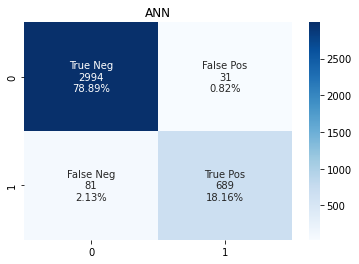

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('ANN')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_act,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3025
           1       0.96      0.89      0.92       770

    accuracy                           0.97      3795
   macro avg       0.97      0.94      0.95      3795
weighted avg       0.97      0.97      0.97      3795

